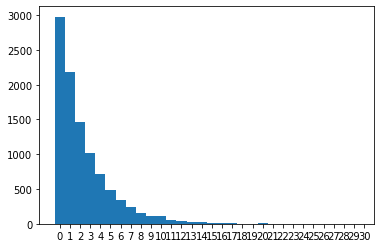

In [3]:
# Aplicar un gap test al generador congruencial lineal implementado en el ejercicio 1
# utilizando el intervalo [0,2 - 0,5]. Analizar el resultado obtenido, e indicar si la
# distribución de probabilidades pasa o no el test. Considerar un nivel de significación del 1%.
from gcl import GCL
import numpy
import matplotlib.pyplot as plt
import math


a = 0.2
b = 0.5

gcl = GCL(97293, 1013904223, 1664525, 2**32)

numero_gaps = 10000
gap = [0] * numero_gaps

while not (a < gcl.random() < b):
    continue

n = 0
longitud = 0
while n < numero_gaps:
    if a < gcl.random() < b:
        gap[n] = longitud
        n += 1
        longitud = 0
    else:
        longitud += 1
    
bins = numpy.arange(0, max(gap) + 1.5) - 0.5

fig, ax = plt.subplots()
(hist, _, _) = ax.hist(gap, bins)
ax.set_xticks(bins + 0.5)
plt.show()

In [4]:
from scipy.stats import chi2

limite_superior = chi2.ppf(0.99, df=len(hist) - 1)

D2_list = [0] * len(hist)
p = b - a
for i in range(len(hist)):
    D2_list[i] = (hist[i] - (1 - p)**i * p * numero_gaps)**2 / ((1 - p)**i * p * numero_gaps)
    
print(D2_list)
D2 = sum(D2_list)

print('D2 = {}'.format(D2))
print('limite superior = {}'.format(limite_superior))
if D2 <= limite_superior:
    print("No hay evidencia para rechazar la hipótesis nula, el generador pasa el test.")
else:
    print("Hay evidencia para rechazar la hipótesis nula, el generador no pasa el test.")

[0.17633333333333334, 2.8971428571428572, 0.06802721088434757, 0.06219630709426276, 0.07398306261279701, 0.3460940877808751, 0.40439728627809857, 0.003554383964570326, 1.861805883908777, 0.6781589329717154, 5.845857088232684, 0.007799569567467871, 0.00660899464798009, 0.00015307227927413323, 0.005907371594867155, 1.2638328105878744, 0.10643548476351139, 0.13731007486763094, 0.16041200341478812, 0.05150256339328015, 5.4328194619645975, 0.2724253491163671, 0.02550025295563401, 0.03899661788919664, 0.5747436941416983, 6.344640567015683, 0.2816244101294322, 0.19713708709060251, 5.384584868482735, 8.448867040559126]
D2 = 41.158851728666065
limite superior = 49.58788447289881
No hay evidencia para rechazar la hipótesis nula, el generador pasa el test.
